#**Collaborative Filtering using knn**

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

In [ ]:
df1=pd.read_csv('/content/movies.csv',usecols=['movieId','title'])
df1.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [ ]:
df=pd.read_csv('/content/ratings.csv',usecols=['userId','movieId','rating'])
df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
a=df.groupby(['movieId']).count()['userId']
a

movieId
1         215
2         110
3          52
4           7
5          49
         ... 
193581      1
193583      1
193585      1
193587      1
193609      1
Name: userId, Length: 9724, dtype: int64

In [ ]:
a.values

array([215, 110,  52, ...,   1,   1,   1])

**calculate nearest neighbour**

Using NearestNeighbors() to calculate the distance between movies using cosine similarity and find the most similar movies for each movie.

In [ ]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=3)

The parameter for the number of the nearest neighbors is set to be 3.

In [ ]:
indices

array([[     0,      1,    561],
       [     1,      2,      0],
       [     2,      1,    575],
       ...,
       [100833, 100832, 100834],
       [100834, 100833, 100832],
       [100835,  57982,  95064]])

indices=nearest movies to each movie. for example [0,1,561] means movies0 is closest to itself , then to 1 and then to 561

In [ ]:
distances

array([[0.00000000e+00, 7.54996730e-02, 1.83017554e-01],
       [0.00000000e+00, 5.71481977e-02, 7.54996730e-02],
       [0.00000000e+00, 5.71481977e-02, 7.03469445e-02],
       ...,
       [0.00000000e+00, 7.77156117e-16, 9.99200722e-16],
       [0.00000000e+00, 9.99200722e-16, 3.66373598e-15],
       [2.22044605e-16, 1.75426340e-12, 5.25068877e-12]])

distances= distance between movies

**Predict a Rating for a Movie by a User**

In [ ]:
for title in df.index:

  index_user_likes = df.index.tolist().index(title) # get an index for a movie
  sim_movies = indices[index_user_likes].tolist() # make list for similar movies
  movie_distances = distances[index_user_likes].tolist() # the list for distances of similar movies
  id_movie = sim_movies.index(index_user_likes) # get the position of the movie itself in indices and distances

  print('Similar Movies to '+str(df.index[index_user_likes])+':\n')


  sim_movies.remove(index_user_likes) # remove the movie itself in indices
  movie_distances.pop(id_movie) # remove the movie itself in distances

  j = 1
  
  for i in sim_movies:
    print(str(j)+': '+str(df.index[i])+', the distance with '+str(title)+': '+str(movie_distances[j-1]))
    j = j + 1
      
  print('\n')

Streaming output truncated to the last 5000 lines.


Similar Movies to 100003:

1: 67954, the distance with 100003: 1.1081535689072552e-09
2: 94209, the distance with 100003: 2.02901717649695e-09


Similar Movies to 100004:

1: 95743, the distance with 100004: 2.0503343467481727e-10
2: 86883, the distance with 100004: 5.563259852792157e-10


Similar Movies to 100005:

1: 67957, the distance with 100005: 9.264611300352499e-11
2: 80930, the distance with 100005: 1.2501352175675606e-09


Similar Movies to 100006:

1: 63787, the distance with 100006: 4.4655934505755113e-10
2: 87378, the distance with 100006: 8.402303297572189e-10


Similar Movies to 100007:

1: 50410, the distance with 100007: 9.342662199429697e-10
2: 94224, the distance with 100007: 1.1455091319945154e-09


Similar Movies to 100008:

1: 82852, the distance with 100008: 2.520589292842601e-10
2: 98224, the distance with 100008: 2.4612173410432092e-09


Similar Movies to 100009:

1: 26438, the distance with 100009: 5.4307258

##**Recommend Similar Movies to a Selected Movie**

Using the algorithm above, we can make a recommender for the similar movies to a selected movie by users.

In [ ]:
def recommend_movie(title):

  index_user_likes = df.index.tolist().index(title) # get an index for a movie
  sim_movies = indices[index_user_likes].tolist() # make list for similar movies
  movie_distances = distances[index_user_likes].tolist() # the list for distances of similar movies
  id_movie = sim_movies.index(index_user_likes) # get the position of the movie itself in indices and distances

  print('Similar Movies to '+str(df.index[index_user_likes])+': \n')

  sim_movies.remove(index_user_likes) # remove the movie itself in indices
  movie_distances.pop(id_movie) # remove the movie itself in distances

  j = 1
    
  for i in sim_movies:
    print(str(j)+': '+str(df.index[i])+', the distance with '+str(title)+': '+str(movie_distances[j-1]))
    j = j + 1

In [ ]:
recommend_movie(1)
recommend_movie(100014)
recommend_movie(0)

Similar Movies to 1: 

1: 2, the distance with 1: 0.05714819772936064
2: 0, the distance with 1: 0.07549967295795124
Similar Movies to 100014: 

1: 91697, the distance with 100014: 1.1791068121880244e-10
2: 86886, the distance with 100014: 1.661108695039104e-09
Similar Movies to 0: 

1: 1, the distance with 0: 0.07549967295795124
2: 561, the distance with 0: 0.1830175537624339


##**Recommend Movies for a Selected User**

In [ ]:
index_for_movie = df.index.tolist().index(0) # it returns 0
sim_movies = indices[index_for_movie].tolist() # make list for similar movies
movie_distances = distances[index_for_movie].tolist() # the list for distances of similar movies
id_movie = sim_movies.index(index_for_movie) # get the position of the movie itself in indices and distances
sim_movies.remove(index_for_movie) # remove the movie itself in indices
movie_distances.pop(id_movie) # remove the movie itself in distances

print('The Nearest Movies to movie_0:', sim_movies)
print('The Distance from movie_0:', movie_distances)

The Nearest Movies to movie_0: [1, 561]
The Distance from movie_0: [0.07549967295795124, 0.1830175537624339]


Predict a Rating (when rating is not given for a particular movie)
Algorithm: predicted rating for a movie is the weighted average of ratings for similar movies.

Build a Recommender

In [ ]:
ratings=pd.merge(df,df1,how='inner', on='movieId')
ratings.head()


,userId,movieId,rating,title
0,1,1,4.0,Toy Story (1995)
1,5,1,4.0,Toy Story (1995)
2,7,1,4.5,Toy Story (1995)
3,15,1,2.5,Toy Story (1995)
4,17,1,4.5,Toy Story (1995)


In [ ]:
df = ratings.pivot_table(index='title',columns='userId',values='rating').fillna(0)
df1 = df.copy()

In [ ]:
def recommend_movies(user, num_recommended_movies):

  print('The list of the Movies {} Has Watched \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_movies = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_movies.append((m, predicted_rating))

  sorted_rm = sorted(recommended_movies, key=lambda x:x[1], reverse=True)
  
  print('The list of the Recommended Movies \n')
  rank = 1
  for recommended_movie in sorted_rm[:num_recommended_movies]:
    
    print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
    rank = rank + 1

In [ ]:
def movie_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_movies = indices[m].tolist()
      movie_distances = distances[m].tolist()
    
      if m in sim_movies:
        id_movie = sim_movies.index(m)
        sim_movies.remove(m)
        movie_distances.pop(id_movie) 

      else:
        sim_movies = sim_movies[:num_neighbors-1]
        movie_distances = movie_distances[:num_neighbors-1]
           
      movie_similarity = [1-x for x in movie_distances]
      movie_similarity_copy = movie_similarity.copy()
      nominator = 0

      for s in range(0, len(movie_similarity)):
        if df.iloc[sim_movies[s], user_index] == 0:
          if len(movie_similarity_copy) == (number_neighbors - 1):
            movie_similarity_copy.pop(s)
          
          else:
            movie_similarity_copy.pop(s-(len(movie_similarity)-len(movie_similarity_copy)))
            
        else:
          nominator = nominator + movie_similarity[s]*df.iloc[sim_movies[s],user_index]
          
      if len(movie_similarity_copy) > 0:
        if sum(movie_similarity_copy) > 0:
          predicted_r = nominator/sum(movie_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_movies(user,num_recommendation)

In [ ]:
movie_recommender(15, 10, 10)

The list of the Movies 15 Has Watched 

(500) Days of Summer (2009)
10 Cloverfield Lane (2016)
101 Dalmatians (One Hundred and One Dalmatians) (1961)
28 Days Later (2002)
9 (2009)
A.I. Artificial Intelligence (2001)
Adjustment Bureau, The (2011)
Aladdin (1992)
Alien (1979)
Aliens (1986)
American Beauty (1999)
American History X (1998)
American Psycho (2000)
Apocalypto (2006)
Avatar (2009)
Avengers, The (2012)
Back to the Future (1985)
Back to the Future Part II (1989)
Back to the Future Part III (1990)
Beautiful Mind, A (2001)
Bicentennial Man (1999)
Bolt (2008)
Bridge of Spies (2015)
Captain America: The Winter Soldier (2014)
Captain Phillips (2013)
Casper (1995)
Cast Away (2000)
Catch Me If You Can (2002)
Chappie (2015)
Children of Men (2006)
Cloudy with a Chance of Meatballs (2009)
Dark Knight Rises, The (2012)
Dark Knight, The (2008)
Deadpool (2016)
District 9 (2009)
Django Unchained (2012)
Doctor Strange (2016)
Edge of Tomorrow (2014)
Escape from L.A. (1996)
Ex Machina (2015)
Fift

In [ ]:
movie_recommender(4, 10, 10)

The list of the Movies 4 Has Watched 

12 Angry Men (1957)
Adventures of Priscilla, Queen of the Desert, The (1994)
Afterglow (1997)
Airplane! (1980)
Aladdin (1992)
All About My Mother (Todo sobre mi madre) (1999)
Almost Famous (2000)
Amadeus (1984)
American Beauty (1999)
Austin Powers: International Man of Mystery (1997)
Austin Powers: The Spy Who Shagged Me (1999)
Barcelona (1994)
Beautiful Thing (1996)
Beauty and the Beast (1991)
Beetlejuice (1988)
Before Night Falls (2000)
Before Sunrise (1995)
Being John Malkovich (1999)
Best in Show (2000)
Big Lebowski, The (1998)
Billy Elliot (2000)
Black Cat, White Cat (Crna macka, beli macor) (1998)
Blow (2001)
Blow-Up (Blowup) (1966)
Blue Velvet (1986)
Bonnie and Clyde (1967)
Bowfinger (1999)
Boys from Brazil, The (1978)
Brazil (1985)
Breakfast Club, The (1985)
Breakfast at Tiffany's (1961)
Bridge on the River Kwai, The (1957)
Bridget Jones's Diary (2001)
Buffalo '66 (a.k.a. Buffalo 66) (1998)
Bullets Over Broadway (1994)
Bulworth (1998)
Butc

In [ ]:
movie_recommender(2, 10, 10)

The list of the Movies 2 Has Watched 

Collateral (2004)
Dark Knight Rises, The (2012)
Dark Knight, The (2008)
Departed, The (2006)
Django Unchained (2012)
Ex Machina (2015)
Exit Through the Gift Shop (2010)
Girl with the Dragon Tattoo, The (2011)
Gladiator (2000)
Good Will Hunting (1997)
Inception (2010)
Inglourious Basterds (2009)
Inside Job (2010)
Interstellar (2014)
Kill Bill: Vol. 1 (2003)
Louis C.K.: Hilarious (2010)
Mad Max: Fury Road (2015)
Shawshank Redemption, The (1994)
Shutter Island (2010)
Step Brothers (2008)
Talladega Nights: The Ballad of Ricky Bobby (2006)
The Drop (2014)
The Jinx: The Life and Deaths of Robert Durst (2015)
Tommy Boy (1995)
Town, The (2010)
Warrior (2011)
Whiplash (2014)
Wolf of Wall Street, The (2013)
Zombieland (2009)


The list of the Recommended Movies 

1: A Street Cat Named Bob (2016) - predicted rating:5.0
2: Adventureland (2009) - predicted rating:5.0
3: Anchorman 2: The Legend Continues (2013) - predicted rating:5.0
4: Deadpool (2016) - predic

#**Neural Collaborative Filtering(NCF)**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
ratings=pd.read_csv('/content/ratings.csv',usecols=['userId','movieId','rating'])
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [ ]:
n_users, n_movies = len(ratings.userId.unique()), len(ratings.movieId.unique())
f'The dataset includes {len(ratings)} ratings by {n_users} unique users for {n_movies} unique movies'

'The dataset includes 100836 ratings by 610 unique users for 9724 unique movies'

In [ ]:
train_df=pd.read_csv('/content/train12.csv',usecols=['userId','movieId','rating'])
train_df.head()

,userId,movieId,rating
0,1,0,4.0
1,1,1,4.0
2,1,2,4.0
3,1,3,5.0
4,1,4,3.0


In [ ]:
cnt_1=0
cnt_2=0
cnt_3=0
cnt_4=0
cnt_5=0
for x in train_df.iterrows():
    if x[1]['rating']==1:
        cnt_1 += 1
    elif x[1]['rating']==2:
        cnt_2 += 1
    elif x[1]['rating']==3:
        cnt_3 += 1
    elif x[1]['rating']==4:
        cnt_4 += 1
    elif x[1]['rating']==5:
        cnt_5 += 1

Distribution of Ratings in the Dataset

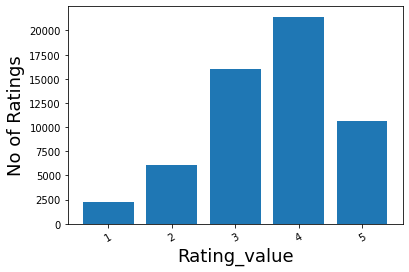

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
label = [1,2,3,4,5]
no_ratings = [cnt_1,cnt_2,cnt_3,cnt_4,cnt_5]
index = np.arange(len(label))
plt.bar(index, no_ratings)
plt.xlabel('Rating_value', fontsize=18)
plt.ylabel('No of Ratings', fontsize=18)
plt.xticks(index, label, fontsize=10, rotation=30)
# plt.title('Market Share for Each Genre 1995-2017')
plt.show()

In [ ]:
len(train_df.movieId.unique())

8954

In [ ]:
n_users, n_movies = len(train_df.userId.unique()), len(train_df.movieId.unique())
f'The dataset includes {len(train_df)} ratings by {n_users} unique users for {n_movies} unique movies'

'The dataset includes 80669 ratings by 610 unique users for 8954 unique movies'

Matrix Factorization with Neural Networks

In [ ]:
from keras.models import Sequential, Model
from keras.layers import Embedding, Flatten, Dense, Dropout, concatenate, multiply, Input
from tensorflow.keras.optimizers import Adam

In [ ]:
from sklearn.datasets import load_iris
from sklearn import preprocessing

In [ ]:
dim_embedding_user = 40
dim_embedding_movie = 40
#book embedding
movie_input = Input(shape=[1],name = 'Movie')
# movie_input = preprocessing.scale(movie_input)
movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
movie_vec = Flatten(name='movie_flatten')(movie_embedding)
movie_vec = Dropout(0.2)(movie_vec)
#user embedding
user_input = Input(shape=[1],name='User')
# user_input = preprocessing.scale(user_input)
user_embedding = Embedding(n_users+1,dim_embedding_user,name = 'User-Embedding')(user_input)
user_vec = Flatten(name='user_flatten')(user_embedding)
user_vec = Dropout(0.2)(user_vec)
#concatenate flattened values
concat = concatenate([movie_vec,user_vec])
concat_dropout = Dropout(0.2)(concat)
#dense layer
dense = Dense(20,name='Fully-Connected1',activation='relu')(concat)
result = Dense(1,activation='relu',name='Activation')(dense)
#define model
model = Model([user_input,movie_input],result)
#show model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 40)        358200      ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 40)        24440       ['User[0][0]']                   
                                                                                              

In [ ]:
from sklearn.datasets import load_iris
from sklearn import preprocessing
x_user = preprocessing.scale(train_df['userId'])

In [ ]:
train_df['rating'].size

80669

In [ ]:
opt_adam = Adam(lr = 2e-3)

## compile model
model.compile(optimizer= opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

## fit model
history_tabular = model.fit([train_df['userId'],train_df['movieId']],
                                    train_df['rating'],
                                    batch_size = 256,
                                    validation_split = 0.1,
                                    epochs = 10,
                                    verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/10
284/284 [==============================] - 3s 7ms/step - loss: 2.3467 - mean_absolute_error: 1.1101 - val_loss: 4.8097 - val_mean_absolute_error: 1.9836
Epoch 2/10
284/284 [==============================] - 2s 6ms/step - loss: 0.7909 - mean_absolute_error: 0.6896 - val_loss: 4.2265 - val_mean_absolute_error: 1.8458
Epoch 3/10
284/284 [==============================] - 2s 6ms/step - loss: 0.7481 - mean_absolute_error: 0.6675 - val_loss: 3.4454 - val_mean_absolute_error: 1.6414
Epoch 4/10
284/284 [==============================] - 2s 6ms/step - loss: 0.7222 - mean_absolute_error: 0.6543 - val_loss: 2.6634 - val_mean_absolute_error: 1.4136
Epoch 5/10
284/284 [==============================] - 2s 6ms/step - loss: 0.7025 - mean_absolute_error: 0.6436 - val_loss: 2.0408 - val_mean_absolute_error: 1.2095
Epoch 6/10
284/284 [==============================] - 2s 6ms/step - loss: 0.6864 - mean_absolute_error: 0.6340 - val_loss: 1.5647 - val_mean_absolute_error: 1.0319
Epoch 7/10
284/2

In [ ]:
pd.DataFrame(history_tabular.history)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,2.346726,1.110052,4.809682,1.983619
1,0.790933,0.689602,4.226528,1.845807
2,0.748124,0.667542,3.445411,1.641395
3,0.722201,0.654318,2.663380,1.413578
4,0.702487,0.643642,2.040794,1.209535
5,0.686440,0.633984,1.564664,1.031908
6,0.672613,0.626560,1.268636,0.913387
7,0.662126,0.620157,1.141176,0.860886
8,0.651188,0.614276,1.037196,0.813446
9,0.637086,0.606975,1.054241,0.822443


In [ ]:
test_df = pd.read_csv("/content/test12.csv")
test_df.head()

,userId,movieId,rating
0,1,0,5.0
1,1,1,5.0
2,1,2,4.0
3,1,3,4.0
4,1,4,4.0


In [ ]:
print(model.metrics_names)
#storing testing ratings
actual=train_df.iloc[:, 2:3]
model.evaluate(x=[test_df['userId'],test_df['movieId']],y=test_df['rating'],verbose=0)

['loss', 'mean_absolute_error']


[1.235095500946045, 0.867125391960144]

In [ ]:
import numpy as np
pr = list(model.predict(x=[test_df['userId'],test_df['movieId']]))
predicted_ratings = list()
for i in range (0,len(pr)):
  predicted_ratings.append(pr[i][0])
#predicted_ratings = np.round_(predicted_ratings)
#print(predicted_ratings[:20])

In [ ]:
userId = np.array(test_df['userId'])
movieId = np.array(test_df['movieId'])
actual_ratings = np.array(test_df['rating'])

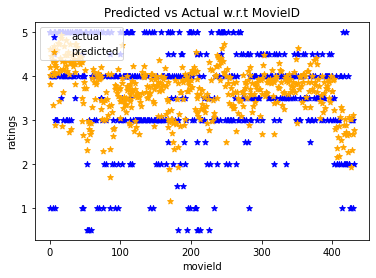

In [ ]:
# importing the required module
import matplotlib.pyplot as plt

plt.scatter(movieId[:500],actual_ratings[:500],label= "stars", color= "blue", marker= "*")
plt.scatter(movieId[:500],predicted_ratings[:500],label= "stars", color= "orange", marker= "*")
plt.title('Predicted vs Actual w.r.t MovieID')
plt.ylabel('ratings')
plt.xlabel('movieId')
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

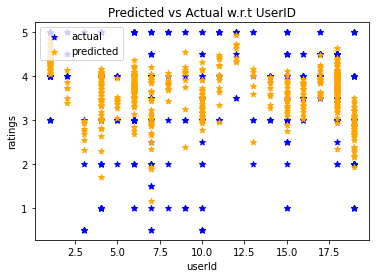

In [ ]:
plt.scatter(userId[:500],actual_ratings[:500],label= "stars", color= "blue", marker= "*")
plt.scatter(userId[:500],predicted_ratings[:500],label= "stars", color= "orange", marker= "*")
plt.title('Predicted vs Actual w.r.t UserID')
plt.ylabel('ratings')
plt.xlabel('userId')
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

In [ ]:
comparision = pd.DataFrame(list(zip(actual_ratings, predicted_ratings)), index = list(movieId),columns =['Actual', 'Predicted'])
comparision

,Actual,Predicted
0,5.0,4.612025
1,5.0,4.214414
2,4.0,4.467746
3,4.0,4.607954
4,4.0,4.349380
...,...,...
5133,5.0,3.027205
5134,3.5,3.311046
5135,4.0,2.498999
5136,3.5,2.978646


In [ ]:
#evaluates on test set
from sklearn.metrics import mean_squared_error,r2_score
def score_on_test_set():
#user_movie_pairs = zip(valid_df[‘movieId’], valid_df[‘userId’])
  predicted_ratings = np.array(comparision[['Predicted']])
  true_ratings = np.array(comparision[['Actual']])
  score = np.sqrt(mean_squared_error(true_ratings, predicted_ratings))
  return score
test_set_score = score_on_test_set()
print(test_set_score)
print(r2_score(actual_ratings, predicted_ratings))

1.1113486630693452
-0.14607763462888057


In [ ]:
import math

s=c=0
for i in range (0,len(actual_ratings)):
  if(predicted_ratings[i]>=4.82):
    s = s + ((actual_ratings[i]-predicted_ratings[i])**2)
    c+=1
s = math.sqrt(float(s/c))
print(s)
print(c)

0.9355537834601669
78


Tabular Data Method

In [ ]:
dim_embedding_user = 50
dim_embedding_movie = 50
#movie embedding
movie_input = Input(shape=[1],name='Movie')
movie_embedding = Embedding(n_movies+1,dim_embedding_movie,name='Movie-Embedding')(movie_input)
movie_vec = Flatten(name='Movie-Flatten')(movie_embedding)
movie_vec = Dropout(0.2)(movie_vec)
#user embedding
user_input = Input(shape=[1],name = 'User')
user_embedding = Embedding(n_users+1,dim_embedding_user,name='User-Embedding')(user_input)
user_vec = Flatten(name='User-Flatten')(user_embedding)
user_vec = Dropout(0.2)(user_vec)
concat = concatenate([movie_vec,user_vec])
concat_dropout = Dropout(0.2)(concat)
dense_1 = Dense(20,name='Fully-Connected1',activation ='relu')(concat)
result = Dense(1,activation='relu',name='Activation')(dense_1)
model_tabular = Model([user_input,movie_input],result)
model_tabular.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Movie (InputLayer)             [(None, 1)]          0           []                               
                                                                                                  
 User (InputLayer)              [(None, 1)]          0           []                               
                                                                                                  
 Movie-Embedding (Embedding)    (None, 1, 50)        447750      ['Movie[0][0]']                  
                                                                                                  
 User-Embedding (Embedding)     (None, 1, 50)        30550       ['User[0][0]']                   
                                                                                            

In [ ]:
opt_adam = Adam(lr = 0.002)

## compile model
model_tabular.compile(optimizer= opt_adam, loss= ['mse'], metrics=['mean_absolute_error'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history_tabular1 = model_tabular.fit([train_df['userId'], train_df['movieId']],
                                    train_df['rating'],
                                    batch_size = 256,
                                    validation_split = 0.005,
                                    epochs = 4,
                                    verbose = 0)

In [ ]:
pd.DataFrame(history_tabular1.history)

,loss,mean_absolute_error,val_loss,val_mean_absolute_error
0,2.810037,1.214731,0.755552,0.670458
1,0.777675,0.681855,0.712458,0.658219
2,0.745464,0.665685,0.746995,0.681848
3,0.721462,0.652848,0.720171,0.661073


In [ ]:
model_tabular.evaluate(x=[test_df['userId'],test_df['movieId']],y=test_df['rating'],verbose=0)

[1.172310709953308, 0.8573973774909973]

In [ ]:
import numpy as np
pr = list(model_tabular.predict(x=[test_df['userId'],test_df['movieId']]))
predicted_ratings = list()
for i in range (0,len(pr)):
  predicted_ratings.append(pr[i][0])
#predicted_ratings = np.round_(predicted_ratings)
#print(predicted_ratings[:20])

In [ ]:
userId = np.array(test_df['userId'])
movieId = np.array(test_df['movieId'])
actual_ratings = np.array(test_df['rating'])

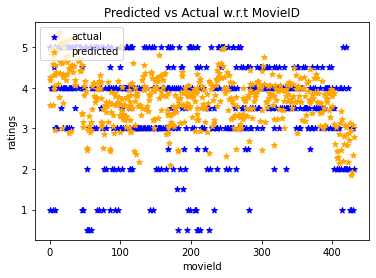

In [ ]:
# importing the required module
import matplotlib.pyplot as plt

plt.scatter(movieId[:500],actual_ratings[:500],label= "stars", color= "blue", marker= "*")
plt.scatter(movieId[:500],predicted_ratings[:500],label= "stars", color= "orange", marker= "*")
plt.title('Predicted vs Actual w.r.t MovieID')
plt.ylabel('ratings')
plt.xlabel('movieId')
plt.legend(['actual', 'predicted'], loc='upper left')
plt.show()

In [ ]:
comparision2 = pd.DataFrame(list(zip(actual_ratings, predicted_ratings)), index = list(movieId),columns =['Actual', 'Predicted'])
comparision2

,Actual,Predicted
0,5.0,4.865798
1,5.0,4.255319
2,4.0,4.881003
3,4.0,4.955130
4,4.0,4.575792
...,...,...
5133,5.0,4.078409
5134,3.5,4.192685
5135,4.0,3.301729
5136,3.5,3.458709
